# 🎈 인스타그램 태그

In [1]:
import requests
from bs4 import BeautifulSoup
from  selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time as time
import getpass
import urllib.request
import random
import re
 
from time import sleep
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
path = 'C:\chromedriver_win32\chromedriver.exe'
driver = webdriver.Chrome(path)

In [3]:
driver.get("https://www.instagram.com/accounts/login/" )
instagram_id= getpass.getpass("Input ID : ")
instagram_pw= getpass.getpass("Input PWD : ")

_id = driver.find_element_by_name('username')
_id.send_keys(instagram_id)
time.sleep(2)

_password = driver.find_element_by_name('password')
_password.send_keys(instagram_pw)
time.sleep(2)

Input ID : ········
Input PWD : ········


In [4]:
login_button = driver.find_element_by_css_selector('.sqdOP.L3NKy.y3zKF').click()
time.sleep(5) # 로그인 버튼 누르기

driver.find_element_by_css_selector('.sqdOP.yWX7d.y3zKF').click()
time.sleep(3) # 로그인 저장 나중에

driver.find_element_by_css_selector('.aOOlW.HoLwm').click()
time.sleep(3) # 설정 나중에

## 태그 수집

In [114]:
_keyword = input("검색어를 입력하세요 : ")
word = str(_keyword) 
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')

검색어를 입력하세요 : 전남나주


In [99]:
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click() #첫번째 게시물 열기
time.sleep(4)

In [ ]:
tagCollect = []
count = 300
for i in range(count):
    data = driver.find_elements_by_css_selector('a.xil3i') # 해쉬태그 정보 저장
    for j in range(len(data)):
        tagCollect.append(data[j].text.replace("#","")) # '#'없애기

    driver.find_element_by_css_selector("div.l8mY4.feth3").click() #다음 게시물로 이동
    time.sleep(3)

## 필요없는 태그들 잘라내기

In [110]:
stop_words = ["광양핫플","전남맛집","광양맛집","전남광양","칠곡","경북칠곡","경북","유성맛집","대전맛집","인천","마곡동","양천구","서대문구","은평구맛집","강서구", "연신내", "맛집", "반사", "soulcoachingoraclecards","서울은평구", "은평구", "임실여행","전북여행","전북임실","문의01066389905","입양문의01066389905타미맘","논산시","논산맛집","논산가볼만한곳","충남논산","논산여행","남양사거리","남양네일","화성남양","남양읍","서귀포시","제주여행","여행","제주도가볼만한곳","제주살이","제주도민","jeju","제주도맛집","제주도","제주시맛집","제주도카페추천","제주도먹방","제주도민추천맛집","제주도현지인맛집","제주도스타그램","제주현지인맛집","제주시가볼만한곳","제주카페","제주도카페","제주시","제주맛집","갤럭시노트20울트라","부산맛집","인스타굿","맞좋아요","오후","첫줄반사","월요일","좋아요램","좋튀","댓글","소통해요","주말","그냥","오랜만","일요일","오늘","디엠","데일리","꿀주말","휴무","선팔","경주충효동", "맞팔","팔로우이벤트","참여이벤트","대구","일상","southkorea","경산남천", "파주시","파주카페","경상남도진주","진주시","안성여행","안성시","likeforlikes","경기도안성","부산여행","부산북구","코로나로나갈수없는요즘","경상북도경주","경주여행","친구","부모님","댓글이벤트","응원이벤트","이벤트","강원도여행", "태백시", "강원도태백", "나주여행","전남나주","나주시","전라남도나주", "전라남도광양","좋아요테러","팔로워","좋아요반사","선팔환영","팔로우환영","선팔좋아요","맞팔좋아요","좋아요","선팔하면맞팔","팔로","팔로우미","선팔하면맞팔가요","팔로우","팔로잉","팔로미","선팔맞팔","소통","맞팔환영","노은동","지족동","대전유성","카톡","충남일수","20세이상누구나","계룡일수","세종일수","논산일수","공주일수","비밀보장","대전일수","대전중구","대전당일대출","대전달돈","대전개인돈","대전유성구","대전대덕구","대전서구","대전동구","대전일수", "대전급전","경상북도경산시","맞팔", "울산","경기도파주", "경기도", "파주", "경상북도", "경북", "경산", "대전", "유성", "전라남도", "전남", "광양", "나주", "강원도", "태백", "경주", "부산", "부산광역시", "북구", "안성", "경상남도", "경남", "진주", "제주", "화성", "칠곡", "충청남도", "충남", "논산", "전라북도", "전북", "임실", "서울","서울광역시", "은평","부산광역시강서구", "부산광역시사상구", "부산광역시북구"]
tagMost = [ i for i in tagCollect if i not in stop_words ]

print(tagMost)


['김포댁', '김포맘', '김포아들맘', '흰소띠맘', '아들맘', '아들맘스타그램', '21주', '21주돌파', '정무무야사랑해', '수향매실', '수향매실농원', '자일로스설탕', '건강한청담기', '매실청', '매실청담그기', '매실청만들기', 'D100', '그때쯤만삭이되려나', '도시어부', '광양횟집', '광양읍맛집', '순천맛집', '순천여행', '신대지구맛집', '하동맛집', '하동여행', '대방어맛집', '전남여행', '방어회', '대방어', '어제는', '백운산', '쫓비산', '봄소식한가득', '매화마을', '인산인해', '홍쌍리매화마을', '등산', 'mountain', '전남광양', '백운산상봉', '블랙야크100대명산', '모찌랑', '무인성인용품', '발렌타인데이', '발렌타인이벤트', '커플데이트', '섬진강', '배알도수변공원', '욕실돔천장시공', '욕실돔', '욕실돔천정', '욕실돔천장', '욕실돔시공문의', '욕실돔천장시공상담', '욕실돔천장시공', '욕실을사랑하는남자', '라이프바스', '등꽃愛', '보라에', '보라빛향기', '등꽃의유혹', '등꽃터널', '나', '등꽃꽃말_환영_사랑의취함', '섬진강', '다압면', '광양매실마을', '등꽃맛집', '등꽃핫플', '드론촬영', '매빅2프로', 'DJl', '섬진강물향기쉼터', '달무리민박', '즐거운우리가족👨\u200d👦\u200d👦👩\u200d👧', '즐거운시간💕', '비오는날', '봄', '꽃놀이', '섬진강', '섬진강매화마을', '매화꽃', '부부일상', '부부스타그램', '신혼부부', '토요일', '주말마다놀러가기', '코로나피해다니기', '광양여행', '전남도립미술관', '한정식맛집', '금수저', '만원의행복', '순천여행', '와온해변', '너무춥다', '주말여행끝', '솔바람맑은물', '카페솔바람맑은물', '농업회사법인', '단체주문음료', '아메리카노', '유기농카페', '매실차', '모과차

## 시각화

<BarContainer object of 30 artists>

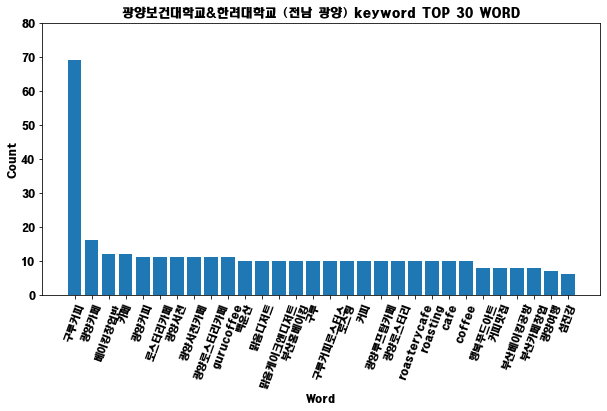

In [111]:
import nltk
 
results_str = " ".join(tagMost) # 결과값 list to string
tokens = results_str.split(" ") # 각 단어별로 떼어 내서
text = nltk.Text(tokens) # text에 저장하고
topWord = text.vocab().most_common(30) # 가장 많이 등장하는 30개의 단어를 추려낸다.
count = 30
xlist = [a[0] for a in topWord[:count ]]
ylist = [a[1] for a in topWord[:count ]]

# 한글 폰트 설정 ( 깨짐 방지 )
from matplotlib import font_manager, rc
font_path = "C:\Windows\Fonts\HMKMRHD.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
    
plt.figure(figsize = (10,5)) # 그래프 크기 지정
plt.xlabel('Word') # X축 이름
plt.xticks(rotation=70) # X축 라벨 회전
plt.ylabel('Count') # Y축 이름
plt.title('광양보건대학교&한려대학교 (전남 광양) '+'keyword TOP '+str(count)+' WORD')
plt.ylim([0, 80]) # 그래프의 Y축 크기 조절
plt.bar(xlist,ylist) # bar로 실행하면 막대그래프. plot으로 실행하면 꺾은선 그래프.



## wordcloud

In [112]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path="C:\Windows\Fonts\HMKMRHD.ttf",max_font_size=60).generate(results_str) # word cloud

(-0.5, 399.5, 199.5, -0.5)

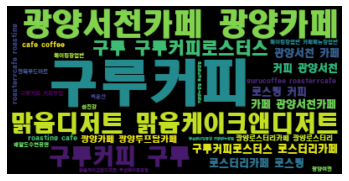

In [113]:
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# 🎈게시글 위치정보

In [59]:
_keyword = input("검색어를 입력하세요 : ")
word = str(_keyword) 
driver.get('https://www.instagram.com/explore/tags/' + _keyword + '/')

검색어를 입력하세요 : 경상북도경주


In [60]:
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click() #첫번째 게시물 열기
time.sleep(5)

In [46]:
import re
from bs4 import BeautifulSoup

def get_content(driver):

    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')


    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.C4VMK > span')[0].text
    except:
        content = ''

    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    # 해쉬 태그는 정규 표현식을 이용해 가져온다.
    tags = re.findall(r'#[^\s#,\\]+', content)  

    #  작성일자 정보 가져오기
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    #  좋아요 수 가져오기
    # 예외처리구문.
    try:
        like = soup.select('div.Nm9Fw > button')[0].text[4:-1]   
    except:
        like = 0
    # 위치정보
    # 예외 처리구문
    try: 
        place = soup.select('div.M30cS')[0].text
    except:
        place = ''
    # 4. 저장하기
    data = [content, date, like, place, tags]
    return data

['', '2021-12-13', 0, '忍城', []]

In [48]:
def next_page(driver):
    next_page = driver.find_element_by_css_selector('div.l8mY4.feth3')
    next_page.click()
    time.sleep(3)
next_page(driver)

In [64]:
# 크롤링 결과를담을 리스트 생성
result = [ ]


# 여러 게시글 수집하기
target = 50      # 크롤링할 게시글 수
for i in range(target):
    # 게시글 수집에 오류 발생시 5초 대기후, 다음 게시글로 넘어가도록 예외처리 구문 활용
    try:
        data = get_content(driver)    # 게시글 정보 가져오기
        result.append(data)
        next_page(driver)
    except:
        time.sleep(5)
        next_page(driver)

In [101]:
resultFrame = pd.DataFrame(result)
resultFrame[3].replace('', np.nan, inplace=True)
resultFrame[[3]].dropna(axis=0)

,3
0,경주 맷돌 순두부
1,경주 황리단길
2,경상북도 경주
3,경상북도 경주
5,경상북도 경주
6,경상북도 경주
7,경주 황리단길
8,경주 황리단길
9,경상북도 경주
12,셀세모


# 🎈 위치, 태그

In [25]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time as time
import getpass
import urllib.request
import random
import re

from time import sleep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def insta_searching(word):
    url = "https://www.instagram.com/explore/tags/" + str(word)
    return url

def select_first(driver):
    driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click()  # 첫번째 게시물 열기
    time.sleep(5)

def get_content(driver):
    # 1. 현재 게시글 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')

    # 2. 본문 내용 가져오기
    # 본문 내용이 없을 수 있으므로 예외 처리구문을 이용
    try:
        content = soup.select('div.e1e1d')[1].text
    except:
        content = ''

    # 3. 작성 일시, 좋아요 수 , 위치 정보 가져오기
    
    # 해시태그
    tags = soup.select('a.xil3i')

    # 작성일자
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]

    # 좋아요
    try :
        like = soup.select('a.zV_Nj')[0].text[4:-1]
    except :
        like = 0

    # 위치
    try :
        place = soup.select('div.M30cS')[0].text
    except :
        place = ''

    data = [content, date, like, place, tags]
    return data

def move_next(driver) :
    driver.find_element_by_css_selector("div.l8mY4.feth3").click()  # 다음 게시물로 이동
    time.sleep(3)

path = 'C:\chromedriver_win32\chromedriver.exe'
driver = webdriver.Chrome(path)

driver.get("https://www.instagram.com/accounts/login/" )
instagram_id= getpass.getpass("Input ID : ")
instagram_pw= getpass.getpass("Input PWD : ")

_id = driver.find_element_by_name('username')
_id.send_keys(instagram_id)
time.sleep(2)

_password = driver.find_element_by_name('password')
_password.send_keys(instagram_pw)
time.sleep(2)

login_button = driver.find_element_by_css_selector('.sqdOP.L3NKy.y3zKF').click()
time.sleep(5)

word = input('태그 입력 : ')
word = str(word)
url = insta_searching(word)

driver.get(url)
time.sleep(8)

select_first(driver)

results = []
target = 100
for i in range(target):

    try :
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except :
        time.sleep(2)
        move_next(driver)

results_df = pd.DataFrame(placeTag)
results_df.columns = ['content', 'date', 'like', 'place', 'tags']

Input ID : ········
Input PWD : ········
태그 입력 : 경상북도경주


In [140]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 원본데이터

In [26]:
results_df

,content,date,like,place,tags
0,,2021-10-09,0,,"[[#불국사], [#유네스코세계유산], [#아이와함께가볼만한곳], [#경상북도경주], [#경주여행추천], [#가족여행], [#한국여행], [#불교], [#사철], [#한일부부], [#慶州], [#慶州旅行], [#仏国寺], [#仏教], [#新羅], [#신라], [#韓国旅行記], [#韓国旅行🇰🇷], [#韓国好きな人と繋がりたい], [#日韓夫婦と繋がりたい], [#寺院], [#寺院巡り], [#ユネスコ世界遺産], [#家族旅行👪]]"
1,,2021-11-15,0,경상북도 경주,"[[#경상북도경주], [#경주], [#경주여행], [#경주바다], [#동해바다], [#바다여행], [#문무대왕릉], [#불국사], [#퇴사], [#퇴사여행중], [#이직성공], [#오래됬다], [#새로운시작], [#새로운길], [#새로운도시], [#도전🙋]]"
2,,2020-03-24,0,,"[[#웨딩촬영준비], [#헤어샵오픈], [#휘게르], [#개인촬영], [#인물촬영], [#경주], [#경주벚꽃], [#수양벚꽃], [#경주여행], [#경주핫스팟], [#캐논], [#캐논이미지스토밍], [#canon], [#canonphotography], [#캐논코리아], [#canonkorea], [#1dx2], [#50mm], [#좋아요], [#좋아요반사], [#좋반], [#경상북도경주]]"
3,,2020-08-13,0,경상북도 경주,[]
4,,2021-10-10,0,,"[[#첨성대야경], [#고분군], [#경주야경], [#동궁과월지], [#아이와함께가볼만한곳], [#경상북도경주], [#경주여행추천], [#가족여행], [#가족여행추천], [#한국여행], [#한일부부], [#慶州], [#慶州旅行], [#夜景撮影], [#人口池], [#新羅], [#신라], [#韓国旅行記], [#韓国旅行🇰🇷], [#韓国好きな人と繋がりたい], [#日韓夫婦と繋がりたい], [#瞻星台], [#ライトアップ綺麗], [#古墳], [#家族旅行👪], [#歴史的建造物]]"
5,,2021-08-10,0,,"[[#경상북도경주], [#해바라기], [#풍경사진], [#southkorea], [#sunflower], [#landscapephotography], [#bnw], [#blackandwhite], [#longexposure], [#liveingmytraces]]"
6,,2020-12-01,0,,"[[#우원재], [#정도운작가], [#잠실창작스튜디오11기입주작가], [#illustration], [#마카], [#펜], [#artbrutkorea], [#아르브뤼코리아], [#사회적협동조합], [#주식회사시우], [#힙합], [#래퍼], [#쇼미더머니6], [#경상북도경주], [#경주고등학교], [#홍익대학교], [#토목공학과], [#aomg]]"
7,,2021-05-19,0,경주분황사꽃밭,"[[#개양귀비], [#papaver_rhoeas], [#양귀비과], [#우미인초], [#poppy], [#관상식물], [#landscapeplant], [#국내여행], [#domestictravel], [#분황사], [#bunhwangsa_temple], [#2021년5월], [#경상북도경주]]"
8,,2021-05-08,0,경상북도 경주,"[[#어버이날여행💕], [#경상북도경주], [#첨성대], [#기단], [#27단], [#정자석], [#플레이콘첨성대], [#새벽5시출발😱], [#비단벌레전기자동차], [#비단벌레차매표소], [#비단벌레차첫차], [#스템프투어시작]]"
9,,2022-02-13,0,경주 교촌마을,"[[#월정교], [#경주], [#경상북도경주], [#경주맛집], [#경주맛스타그램], [#경주여행], [#안압지], [#경주야경], [#경주한정식], [#경주밥집], [#경주한식], [#경주여행지], [#보문관광단지], [#교촌마을], [#교촌한옥마을], [#알천반상], [#꽃시루애], [#경주여행선물], [#오미크론], [#코로나19], [#인후통], [#목감기], [#생선구이], [#경주생선구이], [#울산생선구이], [#포항생선구이], [#대구생선구이]]"


## 가공 데이터 1

In [59]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max.colwidth', 1000)

results_df2 = results_df.set_index("place")
results_df3 = results_df2[["tags"]]
results_df3

,tags
place,
,"[[#불국사], [#유네스코세계유산], [#아이와함께가볼만한곳], [#경상북도경주], [#경주여행추천], [#가족여행], [#한국여행], [#불교], [#사철], [#한일부부], [#慶州], [#慶州旅行], [#仏国寺], [#仏教], [#新羅], [#신라], [#韓国旅行記], [#韓国旅行🇰🇷], [#韓国好きな人と繋がりたい], [#日韓夫婦と繋がりたい], [#寺院], [#寺院巡り], [#ユネスコ世界遺産], [#家族旅行👪]]"
경상북도 경주,"[[#경상북도경주], [#경주], [#경주여행], [#경주바다], [#동해바다], [#바다여행], [#문무대왕릉], [#불국사], [#퇴사], [#퇴사여행중], [#이직성공], [#오래됬다], [#새로운시작], [#새로운길], [#새로운도시], [#도전🙋]]"
,"[[#웨딩촬영준비], [#헤어샵오픈], [#휘게르], [#개인촬영], [#인물촬영], [#경주], [#경주벚꽃], [#수양벚꽃], [#경주여행], [#경주핫스팟], [#캐논], [#캐논이미지스토밍], [#canon], [#canonphotography], [#캐논코리아], [#canonkorea], [#1dx2], [#50mm], [#좋아요], [#좋아요반사], [#좋반], [#경상북도경주]]"
경상북도 경주,[]
,"[[#첨성대야경], [#고분군], [#경주야경], [#동궁과월지], [#아이와함께가볼만한곳], [#경상북도경주], [#경주여행추천], [#가족여행], [#가족여행추천], [#한국여행], [#한일부부], [#慶州], [#慶州旅行], [#夜景撮影], [#人口池], [#新羅], [#신라], [#韓国旅行記], [#韓国旅行🇰🇷], [#韓国好きな人と繋がりたい], [#日韓夫婦と繋がりたい], [#瞻星台], [#ライトアップ綺麗], [#古墳], [#家族旅行👪], [#歴史的建造物]]"
,"[[#경상북도경주], [#해바라기], [#풍경사진], [#southkorea], [#sunflower], [#landscapephotography], [#bnw], [#blackandwhite], [#longexposure], [#liveingmytraces]]"
,"[[#우원재], [#정도운작가], [#잠실창작스튜디오11기입주작가], [#illustration], [#마카], [#펜], [#artbrutkorea], [#아르브뤼코리아], [#사회적협동조합], [#주식회사시우], [#힙합], [#래퍼], [#쇼미더머니6], [#경상북도경주], [#경주고등학교], [#홍익대학교], [#토목공학과], [#aomg]]"
경주분황사꽃밭,"[[#개양귀비], [#papaver_rhoeas], [#양귀비과], [#우미인초], [#poppy], [#관상식물], [#landscapeplant], [#국내여행], [#domestictravel], [#분황사], [#bunhwangsa_temple], [#2021년5월], [#경상북도경주]]"
경상북도 경주,"[[#어버이날여행💕], [#경상북도경주], [#첨성대], [#기단], [#27단], [#정자석], [#플레이콘첨성대], [#새벽5시출발😱], [#비단벌레전기자동차], [#비단벌레차매표소], [#비단벌레차첫차], [#스템프투어시작]]"


## 어떤 지역이 가장 많이 count 되었는지

In [71]:
results_df.groupby(by=['place'], as_index=False).count().sort_values(by='tags', ascending=False)

,place,content,date,like,tags
0,,31,31,31,31
3,경상북도 경주,22,22,22,22
9,경주 황리단길,9,9,9,9
5,경주 교촌마을,7,7,7,7
7,경주 월정교,5,5,5,5
4,경주,2,2,2,2
1,Bunhwangsa,2,2,2,2
23,우양미술관,2,2,2,2
21,신경주역,1,1,1,1
19,석굴암,1,1,1,1


## 지역별로 추출

In [72]:
condition = (results_df.place == '경상북도 경주')
results_df4 = results_df.loc[condition, ['place', 'tags']]
results_df4


,place,tags
1,경상북도 경주,"[[#경상북도경주], [#경주], [#경주여행], [#경주바다], [#동해바다], [#바다여행], [#문무대왕릉], [#불국사], [#퇴사], [#퇴사여행중], [#이직성공], [#오래됬다], [#새로운시작], [#새로운길], [#새로운도시], [#도전🙋]]"
3,경상북도 경주,[]
8,경상북도 경주,"[[#어버이날여행💕], [#경상북도경주], [#첨성대], [#기단], [#27단], [#정자석], [#플레이콘첨성대], [#새벽5시출발😱], [#비단벌레전기자동차], [#비단벌레차매표소], [#비단벌레차첫차], [#스템프투어시작]]"
13,경상북도 경주,"[[#경상북도경주], [#경상북도], [#경주]]"
16,경상북도 경주,"[[#우리들의첫번째여행], [#경주], [#경주여행중에], [#월정교앞], [#월정교에서], [#경주스냅], [#경주스냅촬영], [#경주월정교], [#스냅사진촬영중], [#스냅사진촬영], [#oudw갤러리], [#소니a7r4], [#경상북도경주], [#경주여행], [#경주여행지추천]]"
17,경상북도 경주,"[[#경주도착], [#경상북도경주], [#일단일어나자], [#경주여행]]"
18,경상북도 경주,"[[#경주], [#경상북도], [#경상북도여행], [#경상북도경주], [#경주여행], [#경주가볼만한곳], [#황리단길], [#대릉원], [#월정교], [#소니], [#sony], [#a9m2], [#2470gm]]"
21,경상북도 경주,"[[#경북경주], [#경상북도경주], [#경주황리단길], [#데이트코스], [#경주황리단길옆], [#산책], [#누구의무덤인가], [#나들이그램], [#일상기록✍🏻]]"
22,경상북도 경주,"[[#경상북도경주], [#한옥집]]"
25,경상북도 경주,"[[#불국사], [#경주불국사], [#경주], [#경주나들이], [#경상북도경주], [#경주여행], [#세식구], [#세식구나들이], [#콧바람], [#주말], [#주말일상]]"


# 엑셀 파일로 넘기기

In [2]:
# 매개 변수로 저장할 파일 이름을 전달합니다.
# inventors.to_excel('inventors.xlsx')

NameError: name 'inventors' is not defined